# **Prodigy Infotech - Machine Learning Internship**

# **TASK 1 - Image Classification using SVM**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

### Problem Statement: Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

### Dataset link :- https://www.kaggle.com/c/dogs-vs-cats/data

### Importing the neccesary Libraries

In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import rescale, resize

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset and getting info about it

In [2]:
data_set = "dogs-vs-cats"

with zipfile.ZipFile("/kaggle/input/"+ data_set +"/train.zip","r") as z:
    z.extractall(".")
    
    destination = '/kaggle/files/images'
    z.extractall(destination)

In [3]:
data_ = pd.DataFrame({'file': os.listdir('/kaggle/files/images/train')})
print(data_.head())

           file
0   dog.890.jpg
1  dog.1178.jpg
2  dog.7845.jpg
3  dog.4632.jpg
4  cat.3660.jpg


In [4]:
Y=[]
for i in os.listdir('/kaggle/files/images/train'):
    if 'dog' in i:
        Y.append(1)
    else:
        Y.append(0)
    
        
data_['class'] = Y
print(data_.head())

           file  class
0   dog.890.jpg      1
1  dog.1178.jpg      1
2  dog.7845.jpg      1
3  dog.4632.jpg      1
4  cat.3660.jpg      0


In [5]:
file = data_['file']  

Y = data_['class']

### Visualizing Data

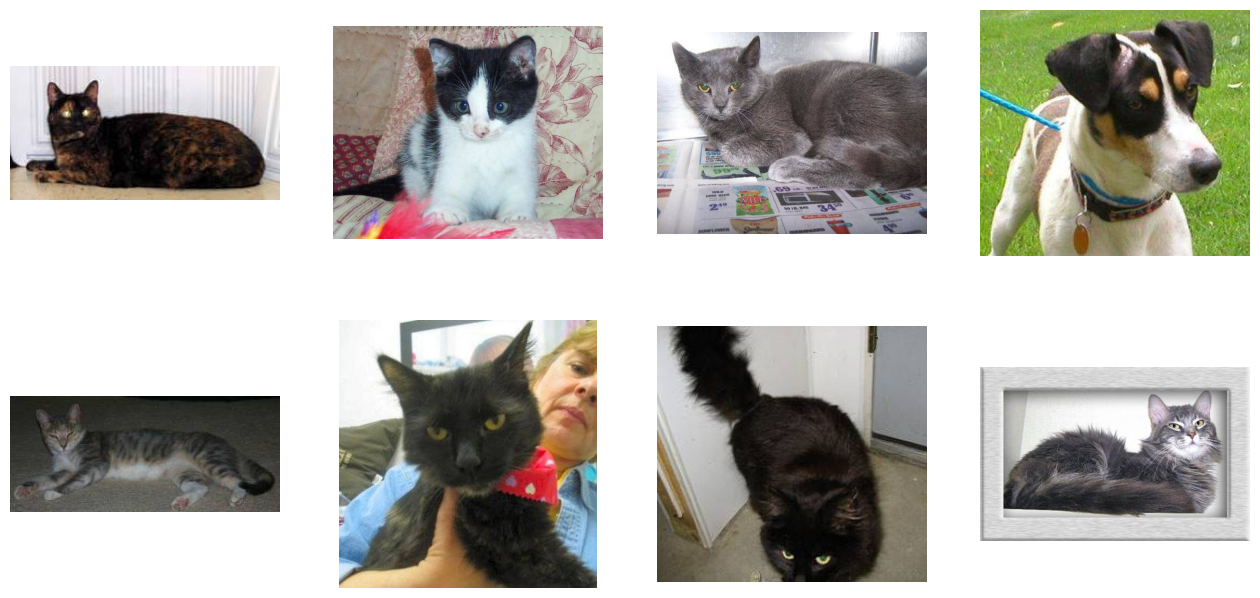

In [6]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir('/kaggle/files/images/train')
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join('/kaggle/files/images/train', img)) 
    fig.imshow(img) 

In [7]:
data_size = 1200
ptr=0
X = []
for i in file:
    img = mpimg.imread('/kaggle/files/images/train/' + i)
    resized_img = resize(img , (128 , 64))
    fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True, channel_axis=-1)
    X.append(fd)
    ptr = ptr+1
    if(ptr >= data_size):
        break

### Separating features and Spiting Data

In [8]:
Y = Y[:data_size]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

### SVC Linear Model

In [9]:
from sklearn.svm import LinearSVC
c=1
svm_LinearSVC = LinearSVC(C=c).fit(X_train, y_train)
accuracy = svm_LinearSVC.score(X_test, y_test)
print('SVC Linear Accuracy: ' + str(accuracy))

SVC Linear Accuracy: 0.6733333333333333


### SVC-SVM Model accuracy

In [10]:
from sklearn.svm import SVC
svm_svc = SVC(kernel='linear', C=c).fit(X_train, y_train)
accuracy = svm_svc.score(X_test, y_test)
print('Svm-Svc Accuracy: ' + str(accuracy))

Svm-Svc Accuracy: 0.68


### Conclusion - As we can see the model is giving accuracy of 0.68 approx.

# **--------------------------------------------Thank You--------------------------------------------**